# Gambaran Grafik Magnitude

## temperature_exh1


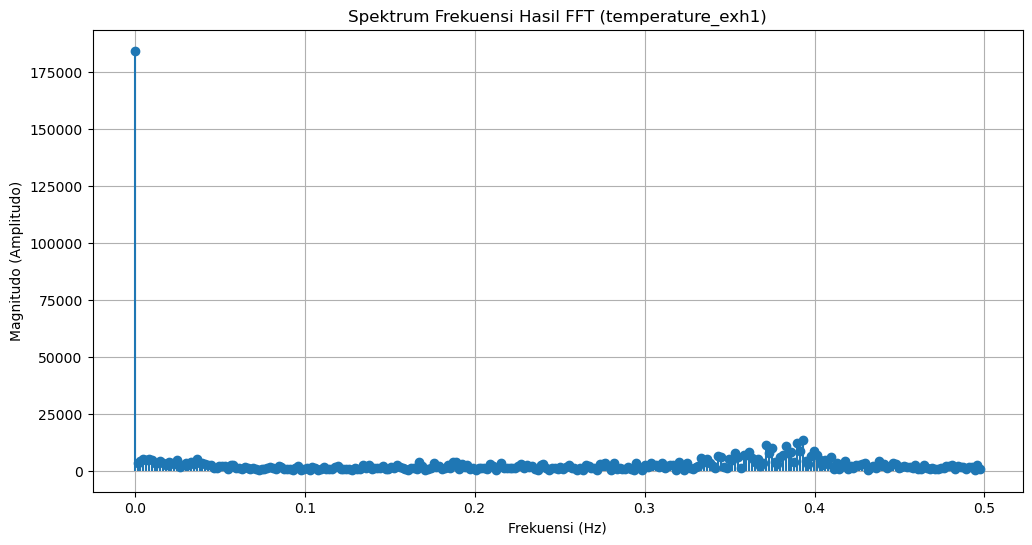

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Baca data dari file CSV
df = pd.read_csv('C:/Users/Lenovo/OneDrive - db/Dattabot 1/AI LLM/Anomali Detection/kmp_legundi_dataset.csv', parse_dates=['Timestamp'])

# Pastikan data terurut berdasarkan timestamp
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Hitung FFT pada kolom suhu
temperature_values = df['temperature_exh1'].values
fft_values = fft(temperature_values)
fft_magnitude = np.abs(fft_values)
fft_freq = np.fft.fftfreq(len(temperature_values), d=1)  # d=1 karena pengambilan data per satuan waktu (jam)

plt.figure(figsize=(12, 6))
plt.stem(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2], basefmt=" ")
plt.title("Spektrum Frekuensi Hasil FFT (temperature_exh1)")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo (Amplitudo)")
plt.grid()
plt.show()

## temperature_fw1

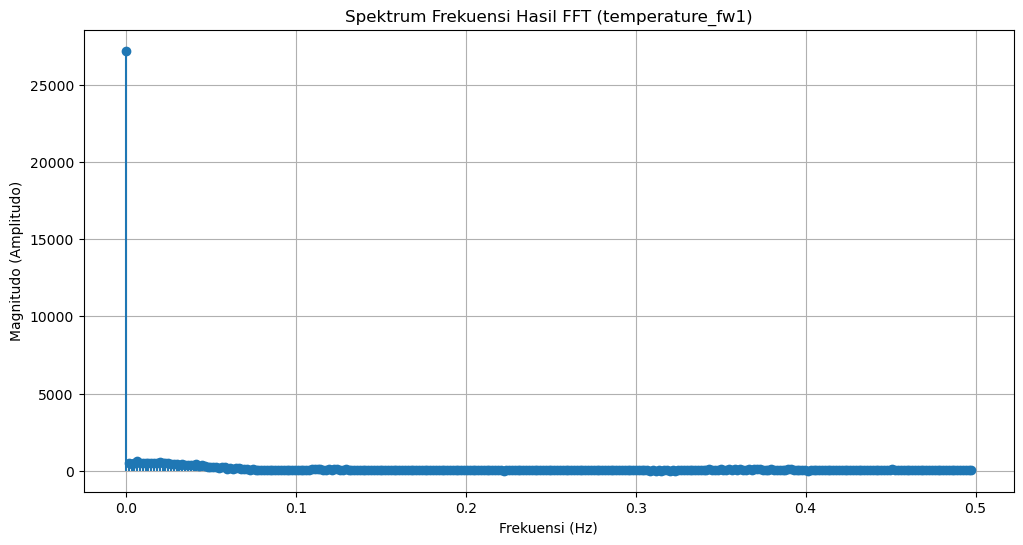

In [6]:
# Hitung FFT pada kolom suhu
temperature_values = df['temperature_fw1'].values
fft_values = fft(temperature_values)
fft_magnitude = np.abs(fft_values)
fft_freq = np.fft.fftfreq(len(temperature_values), d=1)  # d=1 karena pengambilan data per satuan waktu (jam)

plt.figure(figsize=(12, 6))
plt.stem(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2], basefmt=" ")
plt.title("Spektrum Frekuensi Hasil FFT (temperature_fw1)")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo (Amplitudo)")
plt.grid()
plt.show()

## pressure_lo1

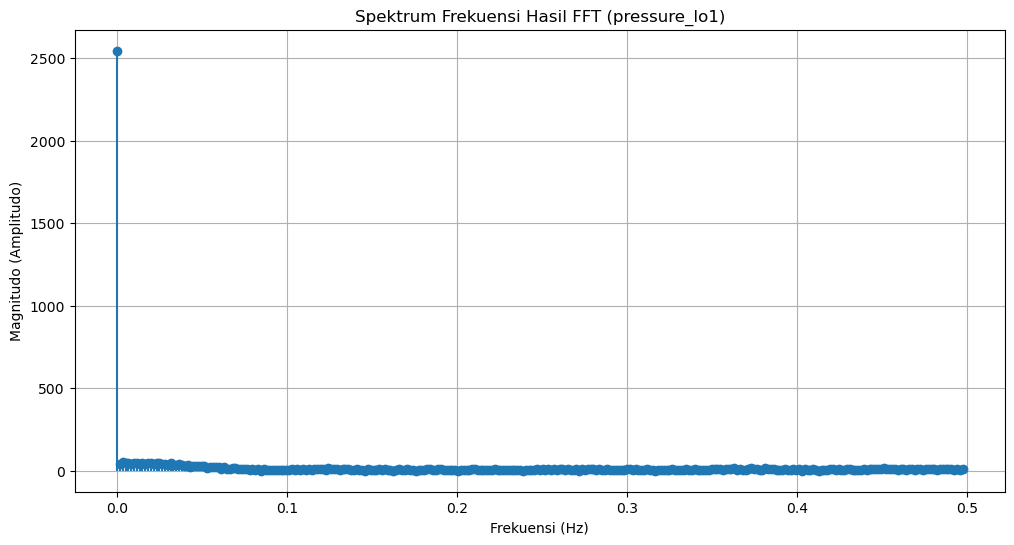

In [7]:
# Hitung FFT pada kolom suhu
temperature_values = df['pressure_lo1'].values
fft_values = fft(temperature_values)
fft_magnitude = np.abs(fft_values)
fft_freq = np.fft.fftfreq(len(temperature_values), d=1)  # d=1 karena pengambilan data per satuan waktu (jam)

plt.figure(figsize=(12, 6))
plt.stem(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2], basefmt=" ")
plt.title("Spektrum Frekuensi Hasil FFT (pressure_lo1)")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo (Amplitudo)")
plt.grid()
plt.show()

# Modeling

## Statistic Thresholding

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13900\2015417642.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["fft_magnitude"] = fft_values_train[:len(df_train)]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13900\2015417642.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["z_score"] = zscore(df_train["fft_magnitude"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13900\2015417642.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

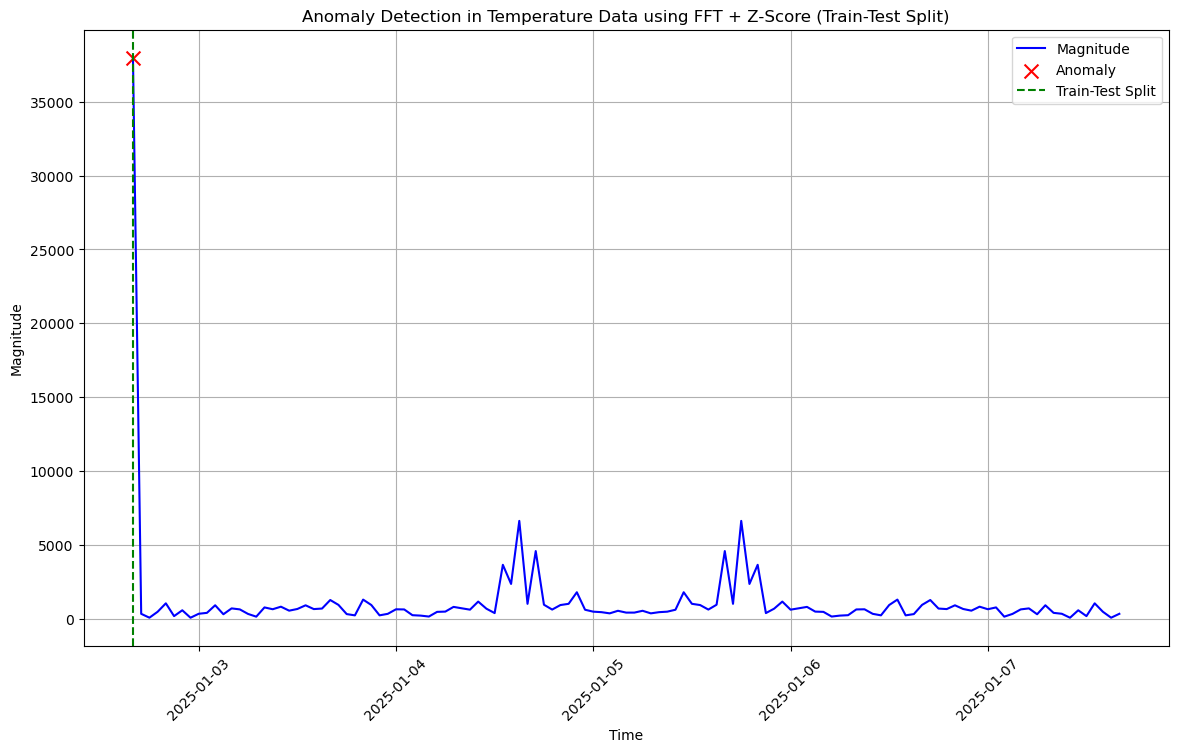

In [8]:
from scipy.stats import zscore
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import matplotlib.pyplot as plt

df = df.sort_values(by="Timestamp").reset_index(drop=True)  # Pastikan data terurut waktu

# Train-test split 80% train, 20% test (berurutan)
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# FFT tanpa rolling window (hanya diterapkan pada data training)
fft_values_train = np.abs(fft(df_train["temperature_exh1"].values))
df_train["fft_magnitude"] = fft_values_train[:len(df_train)]

# Hitung Z-score dari FFT magnitude (hanya untuk data training)
df_train["z_score"] = zscore(df_train["fft_magnitude"])

# Tentukan threshold anomali (misalnya Z-score > 2)
df_train["is_anomaly"] = df_train["z_score"].apply(lambda x: 1 if abs(x) > 2 else 0)

# Terapkan logika dari training untuk data uji
fft_values_test = np.abs(fft(df_test["temperature_exh1"].values))
df_test["fft_magnitude"] = fft_values_test[:len(df_test)]

# Gunakan rata-rata dan standar deviasi dari data training untuk menghitung Z-score data uji
train_mean = np.mean(df_train["fft_magnitude"])
train_std = np.std(df_train["fft_magnitude"])
df_test["z_score"] = (df_test["fft_magnitude"] - train_mean) / train_std
df_test["is_anomaly"] = df_test["z_score"].apply(lambda x: 1 if abs(x) > 2 else 0)

# Gabungkan kembali data training dan testing untuk visualisasi
df_combined = pd.concat([df_train, df_test])

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(14, 8))
plt.plot(df_test["Timestamp"], df_test["fft_magnitude"], label="Magnitude", color="blue")
plt.scatter(df_test[df_test["is_anomaly"] == 1]["Timestamp"], 
            df_test[df_test["is_anomaly"] == 1]["fft_magnitude"], 
            color="red", label="Anomaly", marker="x", s=100)
plt.axvline(x=df_combined["Timestamp"].iloc[train_size], color="green", linestyle="--", label="Train-Test Split")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.legend()
plt.title("Anomaly Detection in Temperature Data using FFT + Z-Score (Train-Test Split)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [9]:
df_test = df_test[['Timestamp','temperature_exh1','fft_magnitude','z_score','is_anomaly']]
cek = df_test[df_test['is_anomaly']==1]
cek

Timestamp  temperature_exh1  fft_magnitude   z_score  is_anomaly
482 2025-01-02 16:00:00               459        37984.0  5.218115           1

## Isolation Forest

In [17]:
data = pd.read_csv("C:/Users/Lenovo/OneDrive - db/Dattabot 1/AI LLM/Anomali Detection/kmp_legundi_dataset.csv", parse_dates=["Timestamp"])
data = data.sort_values(by="Timestamp").reset_index(drop=True)  # Pastikan data terurut berdasarkan waktu


### Magnitude

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Apakah ingin menggunakan hyperparameter tuning?
use_hypertuning = True  # Ganti ke False jika ingin menggunakan Isolation Forest default

# Copy dataset
df = data.copy()
df=df[['Timestamp',
 'temperature_exh1'
#  ,
#  'temperature_fw1','pressure_lo1'
 ]]

# Menghapus NaN karena rolling window menghasilkan nilai kosong di awal
# df = df.dropna(subset=["MA_3h"]).reset_index(drop=True)

# Membagi data menjadi train (80%) dan test (20%) secara berurutan
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# Fungsi untuk melakukan FFT dan standardisasi
def compute_fft(df, column):
    fft_values = np.abs(fft(df[column].values))
    return fft_values[:len(df)]

train_df["fft_temperature_exh1"] = compute_fft(train_df, "temperature_exh1")
test_df["fft_temperature_exh1"] = compute_fft(test_df, "temperature_exh1")

# Standardisasi data berdasarkan training
scaler = StandardScaler()
train_df["fft_temperature_exh1_scaled"] = scaler.fit_transform(train_df[["fft_temperature_exh1"]])
test_df["fft_temperature_exh1_scaled"] = scaler.transform(test_df[["fft_temperature_exh1"]])

features_column = [
    # 'fft_temperature_exh1'
    # ,
    'fft_temperature_exh1_scaled'
    ]
timestamp = df['Timestamp']

# Jika menggunakan hyperparameter tuning
if use_hypertuning:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_samples': ['auto', 0.5, 0.8, 1.0],
        'contamination': [0.05, 0.1, 0.15]
    }

    model = IsolationForest(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(train_df[features_column])

    # Menggunakan model terbaik dari hasil tuning
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    model = grid_search.best_estimator_

else:
    # Jika tidak menggunakan tuning, gunakan parameter default
    model = IsolationForest(contamination=0.1, n_estimators=50,random_state=42)
    model.fit(train_df[features_column])

# Memprediksi anomali pada data test
test_df['anomaly'] = model.predict(test_df[features_column])
test_df['anomaly'] = test_df['anomaly'].map({1: 0, -1: 1})  # Konversi (-1) ke 1 (anomali), (1) ke 0 (normal)

# Mendapatkan decision scores dari model
test_df['decision_score'] = model.decision_function(test_df[features_column])

# Menghitung statistik dari decision scores
decision_max = test_df['decision_score'].max()
decision_mean = test_df['decision_score'].mean()
decision_min = test_df['decision_score'].min()
decision_std = test_df['decision_score'].std()

# Menghitung Proportion of Anomalies (PAD)
proportion_anomalies = test_df['anomaly'].mean() * 100

# Menampilkan hasil evaluasi
print(f'Decision Scores (Max): {decision_max:.6f}')
print(f'Decision Scores (Mean): {decision_mean:.6f}')
print(f'Decision Scores (Min): {decision_min:.6f}')
print(f'Decision Scores (Std Dev): {decision_std:.6f}')
print(f'Proportion of Anomalies: {proportion_anomalies:.2f}%')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Decision Scores (Max): 0.172272
Decision Scores (Mean): 0.110315
Decision Scores (Min): -0.199877
Decision Scores (Std Dev): 0.064784
Proportion of Anomalies: 4.13%


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### Viz

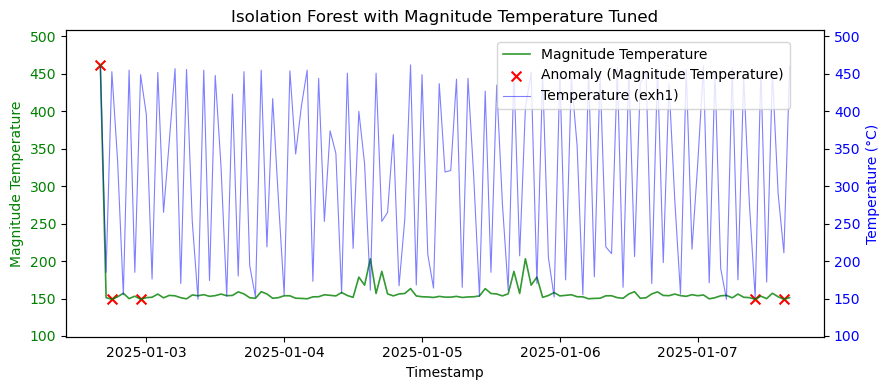

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil data untuk visualisasi
timestamps = test_df['Timestamp']
temperature_values = test_df['temperature_exh1']
fft_temperature_exh1_values = test_df['fft_temperature_exh1']
anomalies = test_df['anomaly']  # Kolom 'anomaly' yang sudah ada

# Normalisasi fft_temperature_exh1 ke dalam rentang suhu
fft_temperature_exh1_min, fft_temperature_exh1_max = fft_temperature_exh1_values.min(), fft_temperature_exh1_values.max()
temp_min, temp_max = temperature_values.min(), temperature_values.max()

# Normalisasi fft_temperature_exh1 menggunakan Min-Max Scaling ke rentang suhu
scaled_fft_temperature_exh1_values = (fft_temperature_exh1_values - fft_temperature_exh1_min) / (fft_temperature_exh1_max - fft_temperature_exh1_min) * (temp_max - temp_min) + temp_min

# Tentukan rentang yang sama untuk kedua grafik pada sumbu Y
y_min = min(temperature_values.min(), scaled_fft_temperature_exh1_values.min()) - 50
y_max = max(temperature_values.max(), scaled_fft_temperature_exh1_values.max()) * 1.1

# Buat figure dan axis
fig, ax1 = plt.subplots(figsize=(9, 4))

# Plot fft_temperature_exh1 yang sudah diskalakan di sumbu kiri dengan garis tipis
ax1.plot(timestamps, scaled_fft_temperature_exh1_values, label='Magnitude Temperature', color='green', linestyle='-', alpha=0.8, linewidth=1.2)
ax1.set_ylabel('Magnitude Temperature', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim([y_min, y_max])  # Sesuaikan rentang sumbu Y

# Menandai titik anomali pada fft_temperature_exh1 (berdasarkan kolom anomaly)
ax1.scatter(timestamps[anomalies == 1], scaled_fft_temperature_exh1_values[anomalies == 1], 
            color='red', label='Anomaly (Magnitude Temperature)', marker='x', s=50)

# Buat sumbu kanan untuk Temperature (exh1) dengan garis tipis
ax2 = ax1.twinx()
ax2.plot(timestamps, temperature_values, label='Temperature (exh1)', color='blue', alpha=0.5, linewidth=0.8)
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([y_min, y_max])  # Sesuaikan rentang sumbu Y agar sejajar

# Tambahkan judul dan legenda
ax1.set_xlabel('Timestamp')
ax1.set_title('Isolation Forest with Magnitude Temperature Tuned')

# Letakkan legenda di tengah kiri
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 0.9))

# Rotasi label timestamp agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan grafik
plt.show()


In [20]:
anomali_test = test_df[test_df['anomaly']==1]
jml_anomaly = (test_df['anomaly']==1).sum()
print(f"Jumlah Anomaly Data Test : {jml_anomaly}")
anomali_test

Jumlah Anomaly Data Test : 5


Timestamp  temperature_exh1  fft_temperature_exh1  \
482 2025-01-02 16:00:00               459          37984.000000   
484 2025-01-02 18:00:00               453             62.543804   
489 2025-01-02 23:00:00               449             60.333437   
596 2025-01-07 10:00:00               151             60.333437   
601 2025-01-07 15:00:00               211             62.543804   

     fft_temperature_exh1_scaled  anomaly  decision_score  
482                     5.218115        1       -0.199877  
484                    -0.355404        1       -0.044103  
489                    -0.355729        1       -0.046821  
596                    -0.355729        1       -0.046821  
601                    -0.355404        1       -0.044103

## Magnitude + Suhu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Apakah ingin menggunakan hyperparameter tuning?
use_hypertuning = True  # Ganti ke False jika ingin menggunakan Isolation Forest default

# Copy dataset
df = data.copy()
df=df[['Timestamp',
 'temperature_exh1'
#  ,
#  'temperature_fw1','pressure_lo1'
 ]]

# Menghapus NaN karena rolling window menghasilkan nilai kosong di awal
# df = df.dropna(subset=["MA_3h"]).reset_index(drop=True)

# Membagi data menjadi train (80%) dan test (20%) secara berurutan
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# Fungsi untuk melakukan FFT dan standardisasi
def compute_fft(df, column):
    fft_values = np.abs(fft(df[column].values))
    return fft_values[:len(df)]

train_df["fft_temperature_exh1"] = compute_fft(train_df, "temperature_exh1")
test_df["fft_temperature_exh1"] = compute_fft(test_df, "temperature_exh1")

# Standardisasi data berdasarkan training
scaler = StandardScaler()
train_df[["fft_temperature_exh1_scaled", "temperature_exh1_scaled"]]= scaler.fit_transform(train_df[["fft_temperature_exh1","temperature_exh1"]])
test_df[["fft_temperature_exh1_scaled","temperature_exh1_scaled"]] = scaler.transform(test_df[["fft_temperature_exh1","temperature_exh1"]])

features_column = [
    # 'fft_temperature_exh1'
    # ,
    'fft_temperature_exh1_scaled' # bisa disesuikan input featurenya
    , 'temperature_exh1_scaled'
    ]
timestamp = df['Timestamp']

# Jika menggunakan hyperparameter tuning
if use_hypertuning:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_samples': ['auto', 0.5, 0.8, 1.0],
        'contamination': [0.05, 0.1, 0.15]
    }

    model = IsolationForest(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(train_df[features_column])

    # Menggunakan model terbaik dari hasil tuning
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    model = grid_search.best_estimator_

else:
    # Jika tidak menggunakan tuning, gunakan parameter default
    model = IsolationForest(contamination=0.1, n_estimators=50,random_state=42)
    model.fit(train_df[features_column])

# Memprediksi anomali pada data test
test_df['anomaly'] = model.predict(test_df[features_column])
test_df['anomaly'] = test_df['anomaly'].map({1: 0, -1: 1})  # Konversi (-1) ke 1 (anomali), (1) ke 0 (normal)

# Mendapatkan decision scores dari model
test_df['decision_score'] = model.decision_function(test_df[features_column])

# Menghitung statistik dari decision scores
decision_max = test_df['decision_score'].max()
decision_mean = test_df['decision_score'].mean()
decision_min = test_df['decision_score'].min()
decision_std = test_df['decision_score'].std()

# Menghitung Proportion of Anomalies (PAD)
proportion_anomalies = test_df['anomaly'].mean() * 100

# Menampilkan hasil evaluasi
print(f'Decision Scores (Max): {decision_max:.6f}')
print(f'Decision Scores (Mean): {decision_mean:.6f}')
print(f'Decision Scores (Min): {decision_min:.6f}')
print(f'Decision Scores (Std Dev): {decision_std:.6f}')
print(f'Proportion of Anomalies: {proportion_anomalies:.2f}%')


Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Decision Scores (Max): 0.186367
Decision Scores (Mean): 0.117966
Decision Scores (Min): -0.133052
Decision Scores (Std Dev): 0.044910
Proportion of Anomalies: 0.83%


### viz

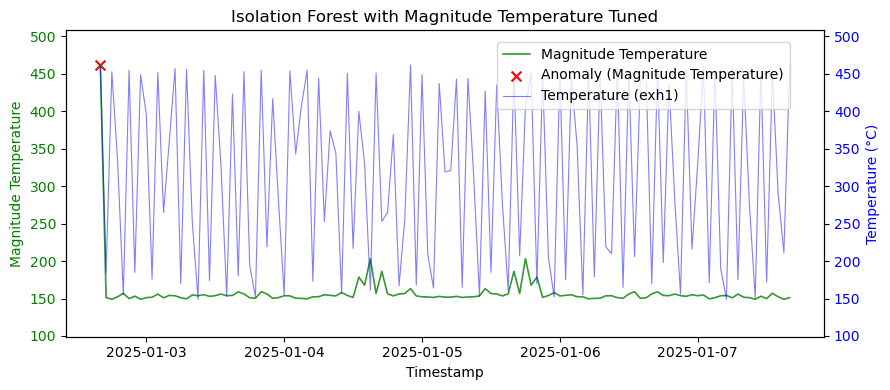

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil data untuk visualisasi
timestamps = test_df['Timestamp']
temperature_values = test_df['temperature_exh1']
fft_temperature_exh1_values = test_df['fft_temperature_exh1']
anomalies = test_df['anomaly']  # Kolom 'anomaly' yang sudah ada

# Normalisasi fft_temperature_exh1 ke dalam rentang suhu
fft_temperature_exh1_min, fft_temperature_exh1_max = fft_temperature_exh1_values.min(), fft_temperature_exh1_values.max()
temp_min, temp_max = temperature_values.min(), temperature_values.max()

# Normalisasi fft_temperature_exh1 menggunakan Min-Max Scaling ke rentang suhu
scaled_fft_temperature_exh1_values = (fft_temperature_exh1_values - fft_temperature_exh1_min) / (fft_temperature_exh1_max - fft_temperature_exh1_min) * (temp_max - temp_min) + temp_min

# Tentukan rentang yang sama untuk kedua grafik pada sumbu Y
y_min = min(temperature_values.min(), scaled_fft_temperature_exh1_values.min()) - 50
y_max = max(temperature_values.max(), scaled_fft_temperature_exh1_values.max()) * 1.1

# Buat figure dan axis
fig, ax1 = plt.subplots(figsize=(9, 4))

# Plot fft_temperature_exh1 yang sudah diskalakan di sumbu kiri dengan garis tipis
ax1.plot(timestamps, scaled_fft_temperature_exh1_values, label='Magnitude Temperature', color='green', linestyle='-', alpha=0.8, linewidth=1.2)
ax1.set_ylabel('Magnitude Temperature', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim([y_min, y_max])  # Sesuaikan rentang sumbu Y

# Menandai titik anomali pada fft_temperature_exh1 (berdasarkan kolom anomaly)
ax1.scatter(timestamps[anomalies == 1], scaled_fft_temperature_exh1_values[anomalies == 1], 
            color='red', label='Anomaly (Magnitude Temperature)', marker='x', s=50)

# Buat sumbu kanan untuk Temperature (exh1) dengan garis tipis
ax2 = ax1.twinx()
ax2.plot(timestamps, temperature_values, label='Temperature (exh1)', color='blue', alpha=0.5, linewidth=0.8)
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([y_min, y_max])  # Sesuaikan rentang sumbu Y agar sejajar

# Tambahkan judul dan legenda
ax1.set_xlabel('Timestamp')
ax1.set_title('Isolation Forest with Magnitude Temperature Tuned')

# Letakkan legenda di tengah kiri
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 0.9))

# Rotasi label timestamp agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan grafik
plt.show()


In [23]:
anomali_test = test_df[test_df['anomaly']==1]
jml_anomaly = (test_df['anomaly']==1).sum()
print(f"Jumlah Anomaly Data Test : {jml_anomaly}")
anomali_test = anomali_test[['Timestamp', 'temperature_exh1','fft_temperature_exh1','anomaly','decision_score']]
anomali_test

Jumlah Anomaly Data Test : 1


Timestamp  temperature_exh1  fft_temperature_exh1  anomaly  \
482 2025-01-02 16:00:00               459               37984.0        1   

     decision_score  
482       -0.133052

Untuk input feature bisa disesuaikan dengan beberapa kombinasi dari variabel yang tesedia